<a href="https://colab.research.google.com/github/WOLVS/GoogleCodeLab/blob/main/K_Means_Customer_Seg_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MEM3456 LAB4 K-means
## Introduction

There are many models for **clustering** out there. In this lab, you will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this lab, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

In this notebook we practice k-means clustering with 2 examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import libraries

Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>


In [ ]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.


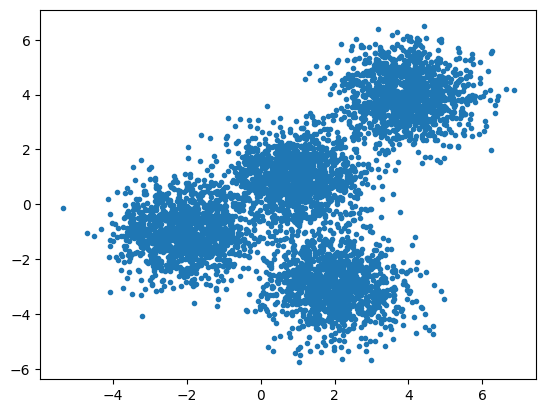

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>


In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>


In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>


In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


Please read through the code and comments to understand how to plot the model.


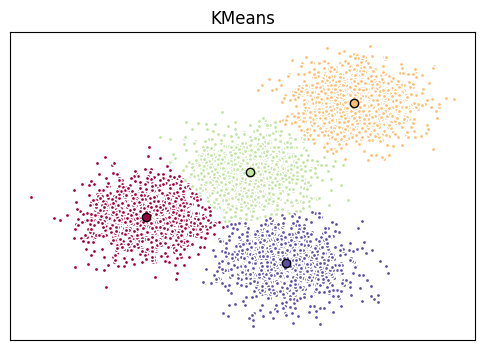

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice

Try to cluster the above dataset into 3 clusters.  
Notice: do not generate data again, use the same dataset as above.


In [ ]:
# write your code here



Double-click **here** for the solution.

<!-- Your answer is below:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


-->


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

Lets download the dataset.


### Load Data From CSV File

Before you can work with the data, you must use the gdrive to load the Cust_Segmentation.csv. use the code snip below
### from google.colab import drive
##drive.mount('/content/gdrive', force_remount = True)
##root_path = 'gdrive/My Drive/MEM3465/' if you work on local Juptyter book, you do not need this part of code

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_path = 'gdrive/My Drive/MEM3465/'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
cust_df = pd.read_csv(root_path + "Cust_Segmentation.csv")
#cust_df = cust_df.astype(float)
#cust_df = cust_df.apply( pd.to_numeric)
cust_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.000,4,5,0.000,0,2.0,1.0
1,3,11,33,1,7,136.000,5,5,0.000,0,6.0,4.0
2,3,68,52,1,24,116.000,1,29,0.000,1,2.0,3.0
3,2,33,33,0,12,33.000,2,0,0.000,1,1.0,1.0
4,2,23,30,1,9,30.000,1,2,0.000,0,4.0,3.0


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


In [ ]:
df = cust_df.drop('address', axis=1)
df['region'] = pd.to_numeric(df['region'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['marital'] = pd.to_numeric(df['marital'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['ed'] = pd.to_numeric(df['ed'], errors='coerce')
df['employ'] = pd.to_numeric(df['employ'], errors='coerce')
df['retire'] = pd.to_numeric(df['tenure'], errors='coerce')
df['gender'] = pd.to_numeric(df['tenure'], errors='coerce')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1850 non-null   float64
 1   tenure   1850 non-null   float64
 2   age      1850 non-null   float64
 3   marital  1850 non-null   float64
 4   income   1850 non-null   float64
 5   ed       1850 non-null   float64
 6   employ   1700 non-null   float64
 7   retire   1850 non-null   float64
 8   gender   1850 non-null   float64
 9   reside   1000 non-null   float64
 10  custcat  1000 non-null   float64
dtypes: float64(11)
memory usage: 159.2 KB


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.33949371,  0.94218941, -0.52352146, ..., -1.33949371,
         0.47203003, -0.23093828],
       [-1.45974216,  0.44138227, -0.52352146, ..., -1.45974216,
         3.0211988 ,  1.78541435],
       [ 1.96733875,  1.3064128 , -0.52352146, ...,  1.96733875,
         0.47203003,  1.11329681],
       ...,
       [-0.61800299, -0.87892749, -0.68707221, ..., -0.61800299,
        -0.80255435, -0.90305582],
       [-0.1971334 , -1.01551126,  1.27553684, ..., -0.1971334 ,
        -0.80255435, -0.90305582],
       [ 1.00535113, -1.01551126,  1.92973986, ...,  1.00535113,
        -0.80255435, -0.90305582]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 2 ... 0 0 0]


<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.


In [ ]:
df["Clus_km"] = labels
df.head(5)

,region,tenure,age,marital,income,ed,employ,retire,gender,reside,custcat,Clus_km
0,2.0,13.0,44.0,1.0,64.0,4.0,5.0,13.0,13.0,2.0,1.0,0
1,3.0,11.0,33.0,1.0,136.0,5.0,5.0,11.0,11.0,6.0,4.0,2
2,3.0,68.0,52.0,1.0,116.0,1.0,29.0,68.0,68.0,2.0,3.0,2
3,2.0,33.0,33.0,0.0,33.0,2.0,0.0,33.0,33.0,1.0,1.0,0
4,2.0,23.0,30.0,1.0,30.0,1.0,2.0,23.0,23.0,4.0,3.0,0


We can easily check the centroid values by averaging the features in each cluster.


In [ ]:
df.groupby('Clus_km').mean()

,region,tenure,age,marital,income,ed,employ,retire,gender,reside,custcat
Clus_km,,,,,,,,,,,
0,222.582721,33.697304,19.667279,4.700980,21.164398,2.862106,4.336032,33.697304,33.697304,2.398977,2.406650
1,2.111111,59.888889,58.444444,0.222222,873.666667,3.444444,32.666667,59.888889,59.888889,1.444444,3.111111
2,2.023923,46.736842,50.311005,0.488038,174.507177,2.803828,21.291866,46.736842,46.736842,2.114833,2.760766


Now, lets look at the distribution of customers based on their age and income:


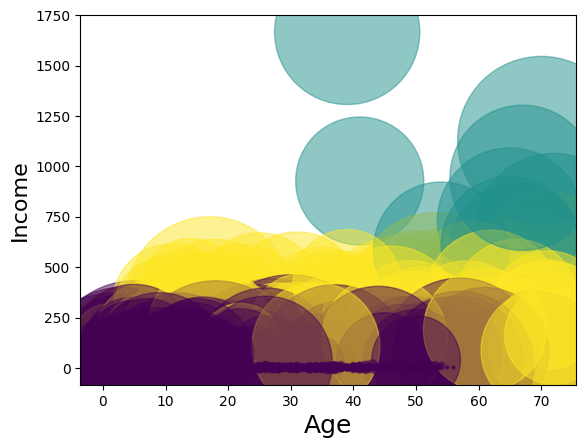

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

-   AFFLUENT and EDUCATED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME
